This notebook is based off of the [deep learning](https://github.com/fastai/fastai/blob/master/courses/dl1/lesson1.ipynb) lesson from fastai 

# Imports and Paths

In [1]:
from fastai.groups.default_cnn import *
# from data_sci.fastai_dl_course import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
PATH = '/data/msnow/data_science/dogscats/'

In [4]:
!ls -lah {PATH}

total 444K
drwxrwxr-x.  8 msnow msnow  112 Feb 13 09:49 .
drwxrwxr-x.  3 msnow msnow   30 Jun  4 16:07 ..
drwxrwxr-x.  2 msnow msnow   28 Feb 13 11:12 models
drwxrwxr-x.  4 msnow msnow   44 Oct 24  2016 sample
drwxr-xr-x.  2 msnow msnow 300K Feb 13 09:44 test1
drwxrwxr-x. 11 msnow msnow 4.0K Jun  5 07:52 tmp
drwxr-xr-x.  4 msnow msnow   42 Oct 24  2016 train
drwxrwxr-x.  4 msnow msnow   42 Oct 24  2016 valid


# Data

We will be using the data from the kaggle competition [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats/data)

You can download the data using the kaggle pip plugin

```
kaggle competitions download -c dogs-vs-cats -p \path\to\download\directory
```

then unzip the files, create separate folders for the dogs and cats in the training set and move 1000 from each set to a separate dogs and cats folder in a validation folder.  I used pictures 10,000 to 11,000 for both the cats and dogs

## Cat Pictures

In [5]:
os.listdir(PATH)

['test1', 'valid', 'train', 'sample', 'tmp', 'models']

In [6]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [7]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.4673.jpg',
 'cat.12076.jpg',
 'cat.67.jpg',
 'cat.2348.jpg',
 'cat.10104.jpg']

(375, 499, 3)
0 255


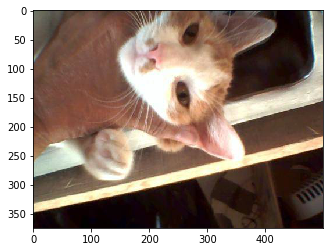

In [8]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);
print(img.shape)
print(np.min(img),np.max(img))

In [9]:
img[100:103,100:103]

array([[[121,  83,  72],
        [119,  81,  70],
        [120,  82,  71]],

       [[121,  83,  72],
        [120,  82,  71],
        [120,  82,  71]],

       [[122,  82,  72],
        [120,  80,  70],
        [120,  80,  70]]], dtype=uint8)

# Using Pre-trained Models

We're going to use a pre-trained model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point.

We will be using the resnet34 model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks).

**TERMS** 
[stack overflow source](https://stackoverflow.com/a/31842945/9073362)


- Batch or Mini-batch
  - subset of training samples used in one iteration of Stochastic Gradient Descent (SGD)
- Batch size
  - The number of training examples in one forward/backward pass. 
  - The higher the batch size, the more memory space you'll need.
- Iterations
  - number of passes, each pass using `batch size` number of examples.
  - one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes)
- Epoch 
  - one forward pass and one backward pass of all the training examples, i.e., the entire training dataset, consists of multiple iterations of SGD
  - Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.
- Learning rate
  - multiplied by the gradient, i.e., derivative, resulting in the rate of gradient descent
  - you might overshoot if you go too large, but if you go small, you might take forever to get there.
- Parameters
  - learned by fitting a model to the data
- Hyperparameters
  - Express "higher-level" properties of the model and cannot be directly learned from the regular training process, such as the *learning rate* and the *number of epochs*
- Fit
  - use *gradient descent* to find the best parameters given the `hyperparameters`
  - `learn.fit` prints 3 performance values: training loss, validation loss, and accuracy
- Accuracy 
  - ratio of correct prediction to the total number of predictions
- Loss
  - represents the price paid for inaccuracy of predictions
  - The loss associated with one example in binary classification is given by: `-(y * log(p) + (1-y) * log (1-p))` where `y` is the true label of `x` and `p` is the probability predicted by our model that the label is 1
  - it is easier to minimize loss than to maximize accuracy



Batch size vs. Iterations 

- It has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize, ddue to the fact that large-batch methods tend to converge to sharp minimizers of the training function.
  - [On Large-Batch Training for Deep Learning: Generalization Gap and Sharp Minima](https://arxiv.org/abs/1609.04836)
- When you put m examples in a minibatch, you need to do O(m) computation and use O(m) memory, but you reduce the amount of uncertainty in the gradient by a factor of only O(sqrt(m)). In other words, there are diminishing marginal returns to putting more examples in the minibatch.
  - [Comments by Ian Goodfellow](https://www.quora.com/In-deep-learning-why-dont-we-use-the-whole-training-set-to-compute-the-gradient)


In [ ]:
# Uncomment the below if you need to reset your precomputed activations
# !rm -rf {PATH}tmp

In [5]:
arch = resnet34
sz = 32
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),bs=32)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

  1%|          | 5/719 [00:00<00:27, 26.07it/s, loss=0.566]   

epoch      trn_loss   val_loss   accuracy   
    0      0.568075   0.493929   0.7775    


    1      0.546834   0.46617    0.7755    



[0.4661696479320526, 0.7755]

`ConvLearner.pretrained` builds *learner* that contains a pre-trained model. By default, when we create a learner from a given architecture, like resnet, it sets the weights for all but the last layer to frozen.  The last layer of the model needs to be replaced with the layer of the right dimensions. The pretained model was trained for 1000 classes therfore the final layer predicts a vector of 1000 probabilities. The model for cats and dogs needs to output a two dimensional vector.

If you set `precompute=True` then the activations for all layers (besides the last one) are calculated and the penultimate layer activations are used as the input from then on.  See the following image:


<img src="images/nn_precompute_freeze-03.png">

The weights for all layers besides for the last one are by default frozen, this means that the only parameters updating with each epoch are the weights for the last layer.  When all layers except for the last layers are frozen, this means that you are assuming that the model has already learned all of the features necessary to make predictions about your data set, i.e., it is already optimized.  This process of using an already trained model to make predictions about a new data set is called **inference**.

# Analyzing Results

In [6]:
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
data.classes

['cats', 'dogs']

This means that cats are label 0 and dogs are label 1

In [8]:
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [9]:
log_preds[:10]

array([[-0.22371933, -1.607138  ],
       [-0.23155926, -1.576466  ],
       [-0.09612864, -2.3897471 ],
       [-0.13410269, -2.0754516 ],
       [-0.20083912, -1.7039906 ],
       [-0.283774  , -1.3981111 ],
       [-0.02116793, -3.8658333 ],
       [-0.04746116, -3.0714805 ],
       [-0.09688682, -2.3822641 ],
       [-0.5630009 , -0.8428021 ]], dtype=float32)

In [10]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [11]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [12]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [13]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [14]:
import PIL

In [15]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


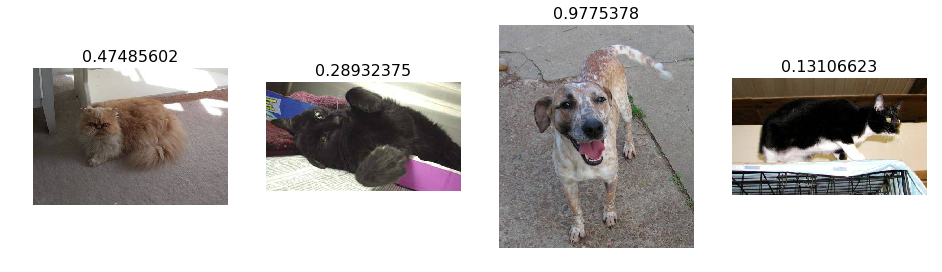

In [16]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


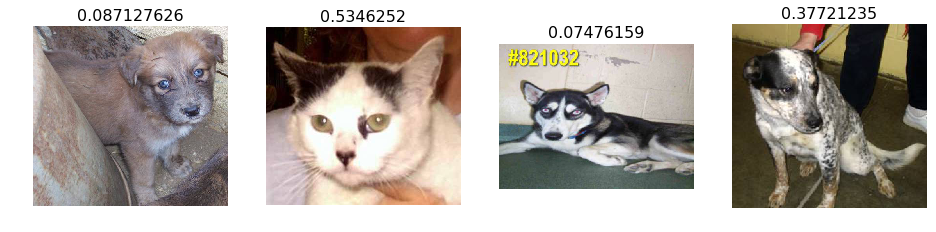

In [17]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [18]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


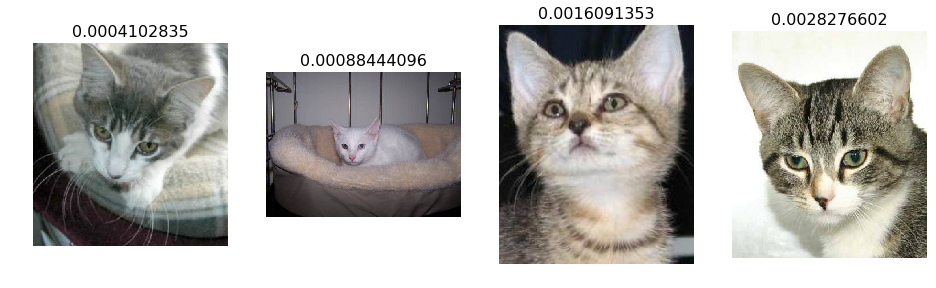

In [19]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


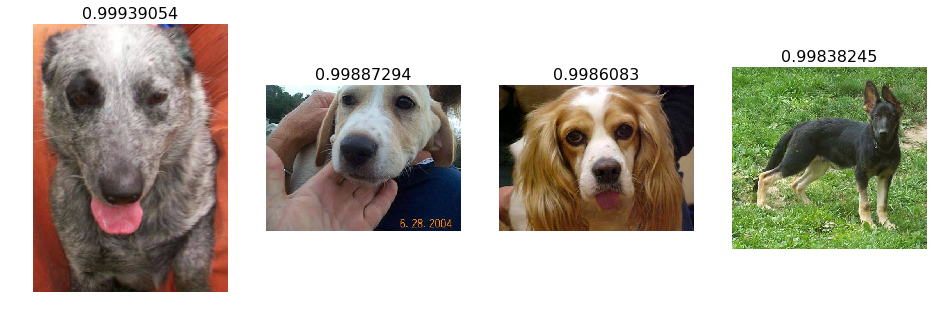

In [20]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


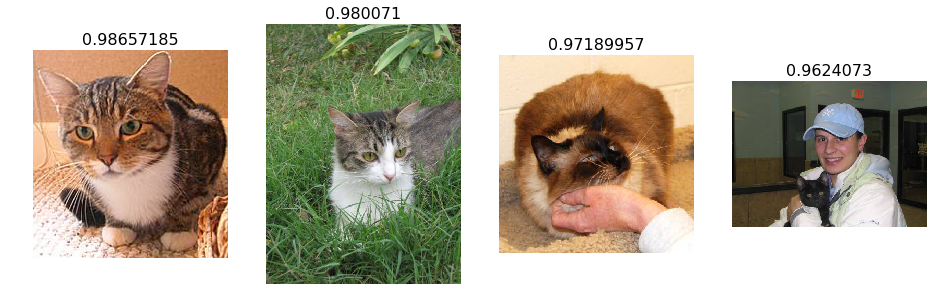

In [21]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


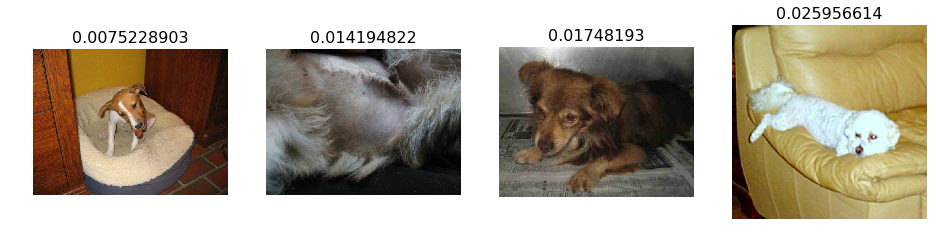

In [22]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


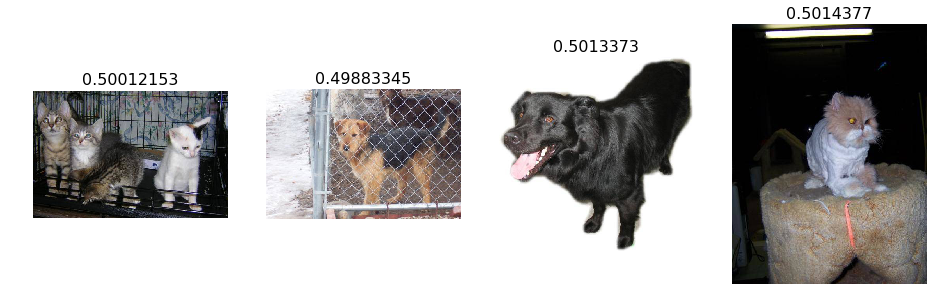

In [23]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

# Choosing a learning rate

The learning rate determines how quickly or how slowly you want to update the weights (or parameters). Learning rate is one of the most difficult parameters to set, because it significantly affects model performance.

Remember that the learning rate gets multiplied by the derivative of the function at that point to tell us the direction we should go next.  If your learning rate is too low (red line) then it will take an inordinate amount of time to reach your minimum, but if it is too high (green line) then you'll go in the right direction each time, but it can spin off into infinity.


<img src="images/learning_rates.png" width="60%">

The method learn.lr_find() helps you find an optimal learning rate. It uses the technique developed in the 2015 paper [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186), where we simply keep increasing the learning rate from a very small value after each mini-batch, until the loss stops decreasing. We can plot the learning rate across batches to see what this looks like.  This wokrs in tandem with so called "dynamic learning rate" methods, which still require a a starting learning rate to modify.

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model.

In [24]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

We can use mini-batches to calculate the learning rate, and then we can make a plot between error vs. learning rate. You want to choose a learning rate where the error doesn’t increase anymore.

In [25]:
lrf=learn.lr_find()

Our learn object contains an attribute sched that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

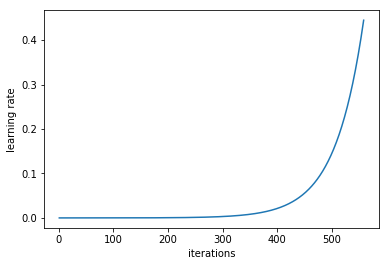

In [26]:
learn.sched.plot_lr()

Note that in the previous plot iteration is one iteration (or minibatch) of SGD. In one epoch there are (num_train_samples/num_iterations) of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing.  To pick the optimal learning rate, find the mininum of the plot and decrease the learning rate by a factor of 10.   Note that the optimal learning rate can change as we training the model, so you may want to re-run this function from time to time.  Most likely once when you start and then again after unfreezing layers.

You can't just use the learning rate with the lowest loss, because by that time the learning rate is already to large and will likely not converge, so you want to back off a little.

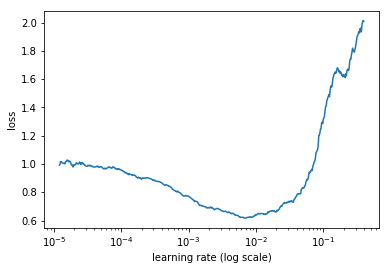

In [27]:
learn.sched.plot()

In [47]:
min_arg = np.argmin(learn.sched.losses)
learn.sched.lrs[min_arg]

0.0067441786831133645

So in this case the minimum is about 1e-2 so the learning rate should be 1e-3

# Improving the model

## Data augmentation

If you try training for more epochs, you'll notice that we start to overfit, which means that our model is learning to recognize the specific images in the training set, rather than generalizing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through data augmentation. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.  in the FastAI library, augmentation generates new data from your data set for each epoch.

We can do this by passing aug_tfms (augmentation transforms) to tfms_from_model, with a list of functions to apply that randomly change the image however we wish. `tfms_from_model` takes care of resizing, image cropping, initial normalization (creating data with (mean,stdev) of (0,1)), and more.  For photos that are largely taken from the side (e.g. most photos of dogs and cats, as opposed to photos taken from the top down, such as satellite imagery) we can use the pre-defined list of functions transforms_side_on. We can also specify random zooming of images up to specified scale by adding the max_zoom parameter

In [52]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [53]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [60]:
ims = np.stack([get_augs() for i in range(6)])

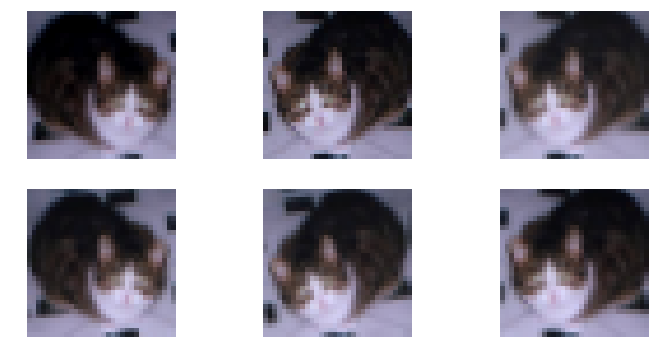

In [61]:
plots(ims, rows=2)Let's create a new data object that includes this augmentation in the transforms.

Let's create a new data object that includes this augmentation in the transforms.

In [102]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

If you set `precompute=True` then the model calculates the activation function for the second to last layer based on the architecture chosen (see following figure).

<img src="images/nn_precompute_freeze-04.png">

This is done to speed up computation when you are just performing inference.  In inference you assume that the parameters of the model do not need to change based on the input.  So instead of calculating the activations for every step along the way, the model just calculates the penultimate activations and uses that as the input layer for any further models.  

Just like when the layers are frozen, the only parameters that can change are those of the last layer.  The reason why in both cases the last layer is left unfrozen is because the linear weights need to match the shape of the output vector.  In addition to the speed of calculations, the difference between the freezing vs precomputed activations has to do with how the output is affected by the input.  When the layers are frozen but the activations are not precomputed, then you can almost think of the neural network as a single layer neural network, i.e., you give the model some inputs and target and then the model changes the weights of a single layer to minimize the loss.  So running multiple epochs where the input data changes with each epoch, such as in augmentation, will result in a higher accuracy.  However, when the the activations are precomputed, there is still that single layer neural network, but now the model does not see any inputs you provide, just the precomputed activations. Those precomputed activations are used to match the predicted outputs to their true values.  So if you try to run multiple epochs, there is no new data for the model to train on and it will start to overfit.

In [103]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.541163   0.479954   0.768     



[0.4799540898799896, 0.768]

In [100]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to frozen. That means that it's still only updating the weights in the last layer when we call fit.  But when precompute is turned off we are using the inputs provided by data, not the precomputed activations, so using augmentations will help.

In [104]:
learn.fit(1e-2, 3, cycle_len=1)

  1%|          | 3/360 [00:00<00:23, 15.21it/s, loss=0.502]  

epoch      trn_loss   val_loss   accuracy   
    0      0.497624   0.440358   0.7915    


  1%|          | 3/360 [00:00<00:22, 15.98it/s, loss=0.476]  

    1      0.475572   0.43534    0.794     


    2      0.475019   0.435414   0.799     



[0.4354135775566101, 0.799]

As we get closer to the minimized loss, we may want to gradually decrease the learning rate to get a more precise result, termed *learning rate annealing*. This is commonly done with a stepwise (drop the learning rate by 10x) or cosine function.  This is helpful because as we get closer to the optimal weights, we want to take smaller steps. 

However, we may find ourselves in a part of the weight space that isn't very resilient - that is, small changes to the weights may result in big changes to the loss. We want to encourage our model to find parts of the weight space that are both accurate and stable. Therefore, from time to time we increase the learning rate, i.e., we want to restart the stochastic gradient descent, hence the name *stochastic gradient descent with restarts (SGDR)*, which will force the model to jump to a different part of the weight space if the current area is "spikey". Here's a picture of how that might look if we reset the learning rates 3 times (in this paper they call it a "cyclic LR schedule"):

<img src="images/sgdr_paper.png" width="80%">
(From the paper [Snapshot Ensembles](https://arxiv.org/abs/1704.00109)).

Smoother surfaces correlate to a more generalized frameworks due to their ability to remain stable under varying data.  For example in the image below there are two sets of data, the training set (red) and the test set (blue).  If you have a spiky part of the weight space, the right black dotted line, then even though it might be in a minimum for your training, in your test set it can lead you to areas which no longer minimize the loss.  While minima in smoother areas, such as the left dotted line, will maintain similar losses even with slight shifts in data.

<img src="images/SGDR.png" width="50%">


SGDR reduces the learning rate every mini-batch, and resets the learning rate every `cycle_len` epcohs.  In other words, the number of epochs between resetting the learning rate is set by `cycle_len`, and the number of times this happens is refered to as the *number of cycles*; this is what we're actually passing as the 2nd parameter to `fit()`. So here's what our actual learning rates looked like:

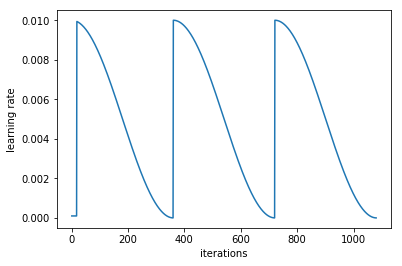

In [67]:
learn.sched.plot_lr()

Our validation loss isn't improving much, so there's probably no point further training the last layer on its own.

Since we've got a pretty good model at this point, we might want to save it so we can load it again later without training it from scratch.  By default all models are saved in the *models* folder in the PATH used in `ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),bs=32)`

In [69]:
learn.save('224_lastlayer')

### Fine-tuning and differential learning rate annealing

Now that we have a good final layer trained, we can try fine-tuning the other layers. To tell the learner that we want to unfreeze the remaining layers, just call (surprise surprise!) `unfreeze()`.

In general you can only freeze layer from ‘n’ and on. Note that the other layers have already been trained to recognize ImageNet photos (whereas our final layers were randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we’ve seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our Fully Connected (FC) layers we’ll leave at 1e-2 as before, a process unsurpirsingly termed differential learning rates (although there is no standard name for this technique).

In [105]:
learn.unfreeze()

We are going to specify ‘differential learning rates’ for different layers. We are grouping the blocks (ResNet blocks) in different areas and assigning different learning rates.

In [106]:
lr=np.array([1e-4,1e-3,1e-2])

Terminology again (because it gets confusing):

- n_cylce: Number of cycles
- cycle_len: Number of cycles between lr restarts
- cycle_mult: Multiplies the number of epochs per cycle after each cycle, starting from epochs = 1
  - Example 1: n_cylce=3, cycle_len=1, cycle_mult=2
    - cycle 1: 1 epoch
    - restart
    - cycle 2: 2 * (1 epoch) = 2 epochs
    - restart
    - cycle 3: 2 * (2 epochs) = 4 epochs
    - Total epochs = 7
  - Example 2: n_cylce=5, cycle_len=2, cycle_mult=3
    - cycle 1: 1 epoch
    - cycle 2: 3 * (1 epoch) = 3 epochs
    - restart
    - cycle 3: 3 * (3 epochs) = 9 epochs
    - cycle 4: 3 * (9 epochs) = 27 epochs
    - restart
    - cycle 5: 3 * (27 epochs) = 81 epochs
    - Total epochs = 121

In [107]:
learn.fit(lr, n_cycle=3, cycle_len=1, cycle_mult=2)

  0%|          | 0/360 [00:00<?, ?it/s]                      

epoch      trn_loss   val_loss   accuracy   
    0      0.491331   0.442654   0.789     


  0%|          | 0/360 [00:00<?, ?it/s]                      

    1      0.505186   0.447253   0.781     


  0%|          | 0/360 [00:00<?, ?it/s]                      

    2      0.4831     0.440895   0.787     


  0%|          | 0/360 [00:00<?, ?it/s]                      

    3      0.490535   0.459767   0.779     


  0%|          | 0/360 [00:00<?, ?it/s]                      

    4      0.487248   0.439863   0.7915    


  0%|          | 0/360 [00:00<?, ?it/s]                      

    5      0.465813   0.434352   0.796     


    6      0.46416    0.431766   0.7955    



[0.4317655873298645, 0.7955]

In [108]:
# Check the accuracy of the new learned model
log_preds = learn.predict()
preds = np.argmax(log_preds, axis=1)
(preds == data.val_y).sum()/preds.shape[0]

0.7955

Using the lr schedule plotter You can visualize the interaction between `cycle_mult`, `cycle_len` and `n_cycles`

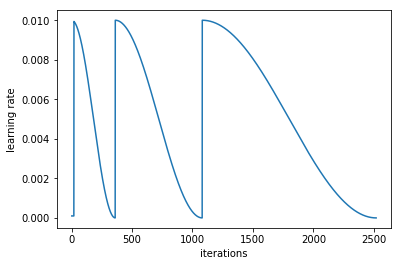

In [109]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [110]:
learn.save('224_all')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.  What this does is, hoepfully, provide the model with slighlty more information on which to make predictions.  Remember, that all the neural network is doing is apptern matching, and TTA is giving the model a pattern along with slight variations on said pattern, thereby allowing it more oppurtunities to match the test data to a pattern it is already familiar with. 

In [111]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [121]:
accuracy_np(probs, y)

0.817

# Analyzing results

## Confusion Matrix

In [8]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

NameError: name 'probs' is not defined

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

AttributeError: module 'numpy' has no attribute 'testing'

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

In [ ]:
cm.shape

In [ ]:
plot_confusion_matrix(cm, data.classes)

## Looking at pictures again

Most incorrect cats


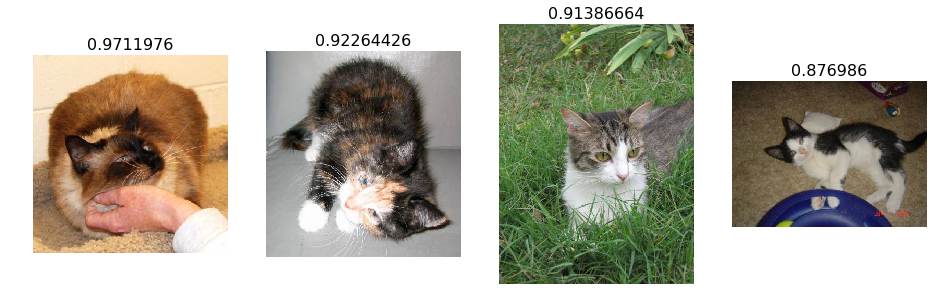

In [130]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


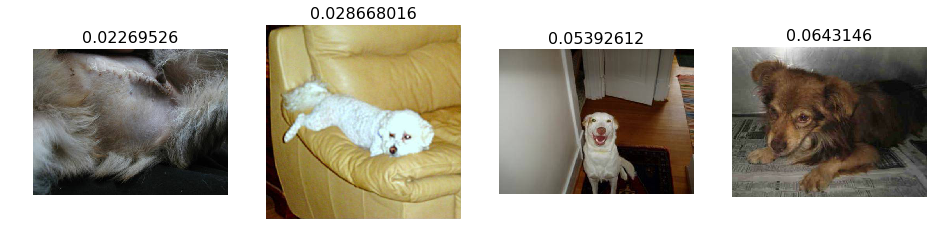

In [131]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

# Review: Easy steps to train a world class image classifier

1. Enable data augmentation, and precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting